# Plotting <font color = bluie>Sigmoid Function</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

Sigmoid of x is given by
$S_{w,b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [2]:
def sigmoid(x, w, b):
    return 1/(1+np.exp(-(w*x+b)))

In [3]:
w = 0.9 
b = 0.1
X = np.linspace(-10, 10, 100)
Y = sigmoid(X, w, b)

In [4]:
sigmoid(1, 0.5, 0)

0.6224593312018546

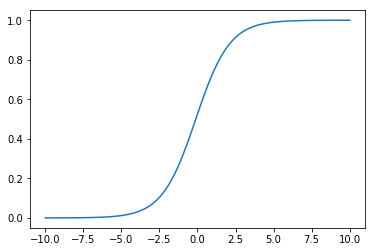

In [5]:
plt.plot(X, 1*Y)
plt.show()

## 2D plot

For a 3D plot, we need more features (i.e. more x's). So let's have 2 x's.
<br>Our modified formula for 2 variables will be-
<br>$S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1 + e^{-(w_1x-1 + w_2x-2 + b)}}$

In [6]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [7]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

Now we are to plot the above <strong><font color = blue>sigmoid_2d()</font></strong> function. Since it is a 3 dimensional plot (2 dimensions for x1, x2 and 1 dimension for y) therefore we must learn to plot a 3D function first.
<br>We go to this __[link](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)__

In [8]:
from mpl_toolkits import mplot3d

In [9]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [10]:
w1 = 0.5
w2 = 2
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

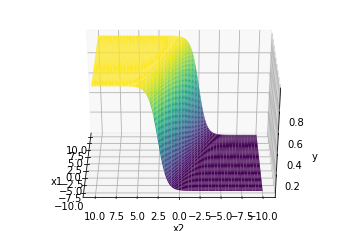

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 180)    #first arg = angle
                         #second arg = rotation of plane

# Compute Loss for a Given Dataset

Now what we are going to do is - 
<br><strong>We are given a dataset (X and Y), for which we do not know the values of w and b. We need to find the w and b by plotting the loss plot</strong>.

In [12]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 -10
Y = sigmoid(X, w_unknown, b_unknown)

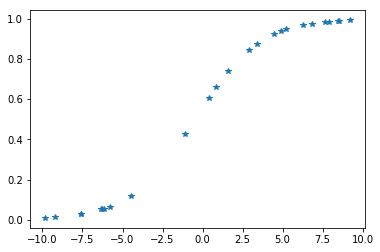

In [13]:
plt.plot(X, Y, '*')
plt.show()

In [14]:
def calculate_loss(X, Y, w_est, b_est):    # w_est and b_est - estimates of w and b
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, w_est, b_est))**2
        return loss


In [15]:
W = np.linspace(-1, 1, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [16]:
WW.shape

(101, 101)

In [17]:
for i in range(WW.shape[0]):    # iterate in rows
    for j in range(WW.shape[1]):    # iterate in columns
        Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i,j])

Text(0.5, 0, 'Loss')

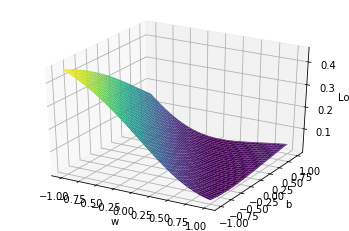

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

# ax.view_init(30, 180)

Since from above plot we can observe that a negative value for w is very bad choice. Also it's not clear which positive value is highly suitable for w in positive region. So we make changes in our dataset as follows...
<br> Instead of starting W from -1, we initialise it from 0 till 2.

In [19]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [20]:
for i in range(WW.shape[0]):    # iterate in rows
    for j in range(WW.shape[1]):    # iterate in columns
        Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i,j])

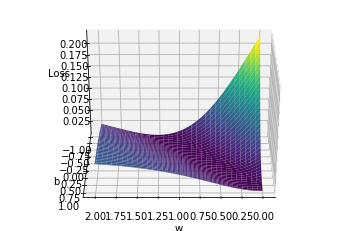

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 90)

In [22]:
ij = np.argmin(Loss)    # gives the coordinate of of number which is minimum
                        # but in different format (either row wise or column wise)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [23]:
print(i, j)

77 16


In [24]:
print(WW[i, j], BB[i, j])

0.32 0.54


# Contour plot

In [25]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [26]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

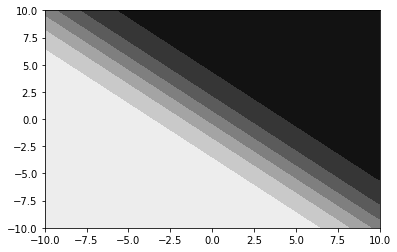

In [27]:
plt.contourf(XX1, XX2, Y, cmap = 'binary')
plt.show() # black = 1 and white = 0

For custom coloured map

In [28]:
my_cmap =  matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

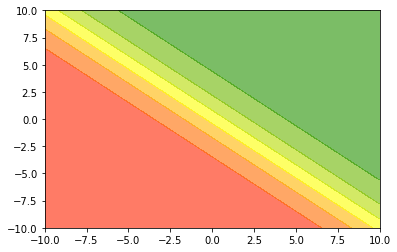

In [29]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

# Class for Sigmoid Neuron

In [30]:
class SigmoidNeuron:
    
    def _init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, display_loss = False):
        
        # initialise w, b
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
            
        if display_loss:
            loss = {}
        
        for i in tqdm_notebook(range(epochs), total = epochs, unit = 'epoch'):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)    
            self.w -= learning_rate * dw
            self.b -= learning_rate * db
            
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss[i] = mean_squared_error(Y_pred, Y)
        
        if display_loss: 
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
    
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

# Fit for Toy data

In [31]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1,1,1,0,0,0]

In [32]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [33]:
def plot_sn(X, Y, sn):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    plt.contourf(XX1, XX2, YY, cmap = my_cmap, alpha = 0.6)
    plt.scatter(X[:,0], X[:,1], c = Y, cmap = my_cmap)
    plt.plot()
    plt.show()


[[0.24516898 0.62992742]] [0.00919173]


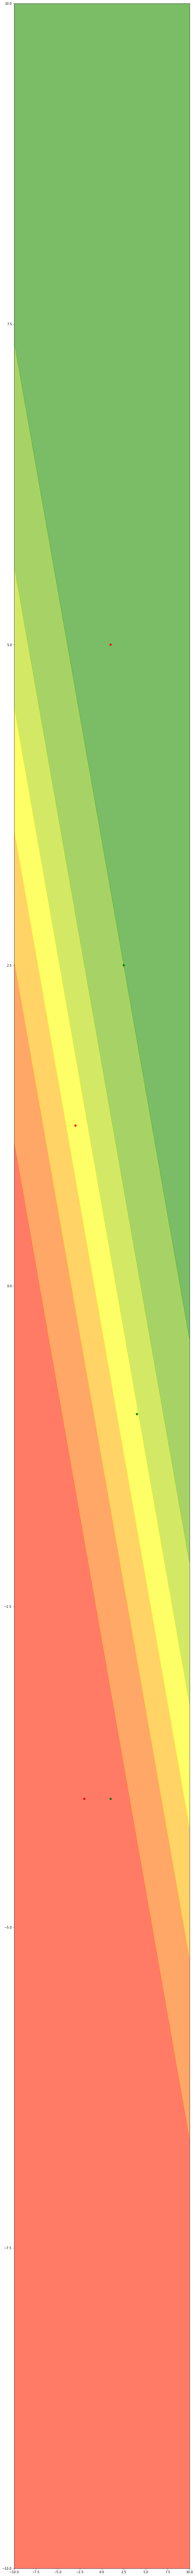


[[0.45963701 0.45775678]] [0.01536696]


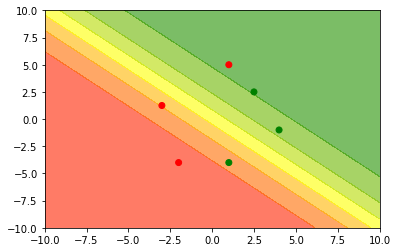


[[0.56704719 0.24194578]] [0.02677136]


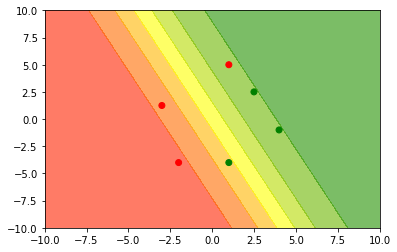


[[ 0.62543736 -0.02621401]] [0.03129621]


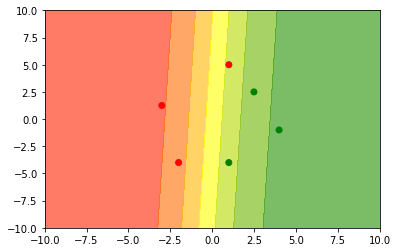


[[ 0.66150982 -0.22244825]] [0.00429054]


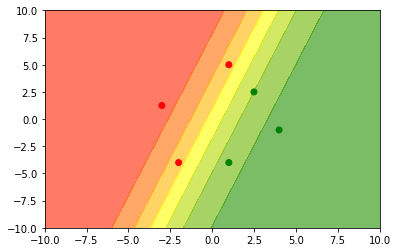


[[ 0.72963258 -0.24342931]] [-0.02587982]


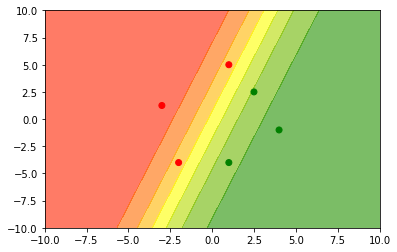


[[ 0.7884563  -0.26201963]] [-0.05497872]


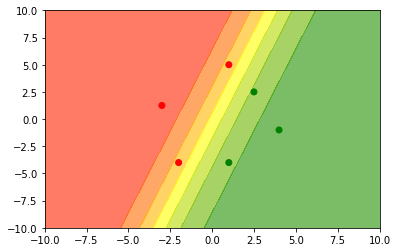


[[ 0.84071946 -0.27865225]] [-0.08290605]


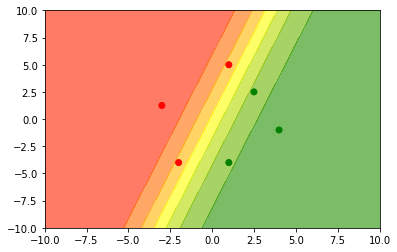


[[ 0.88797823 -0.29377787]] [-0.10963857]


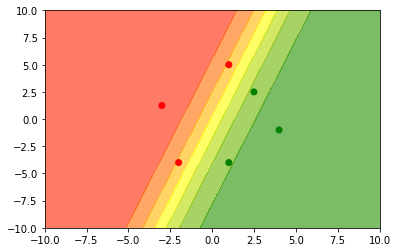


[[ 0.93124384 -0.30767618]] [-0.13518919]


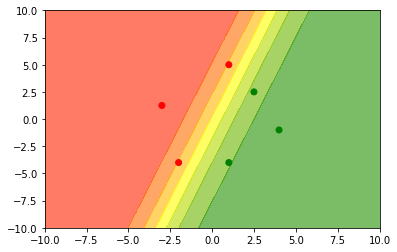


[[ 0.9712138  -0.32054821]] [-0.15959199]


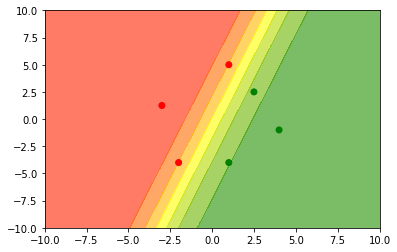


[[ 1.00839568 -0.33254354]] [-0.18289303]


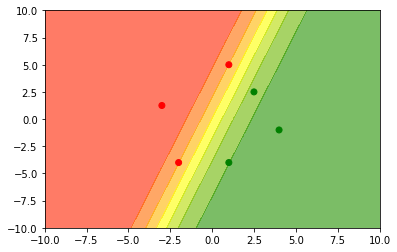


[[ 1.04317442 -0.34377771]] [-0.20514473]


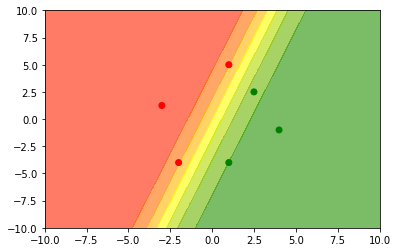


[[ 1.07585175 -0.35434264]] [-0.22640234]


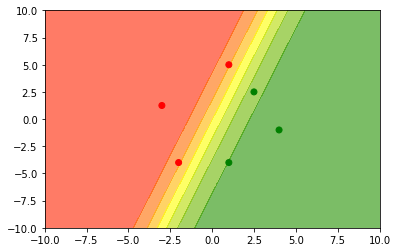


[[ 1.10667046 -0.36431318]] [-0.24672159]


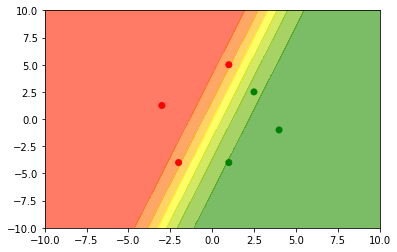


[[ 1.13583017 -0.37375149]] [-0.26615726]


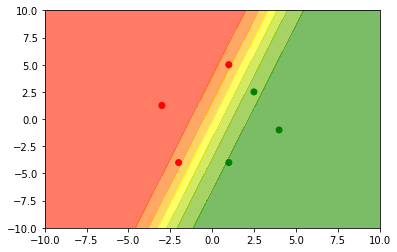


[[ 1.16349786 -0.38270993]] [-0.28476221]


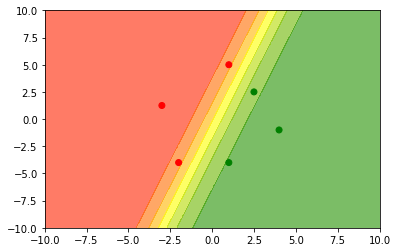


[[ 1.18981518 -0.39123326]] [-0.30258687]


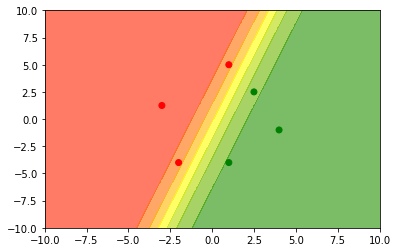


[[ 1.21490377 -0.39936006]] [-0.31967891]


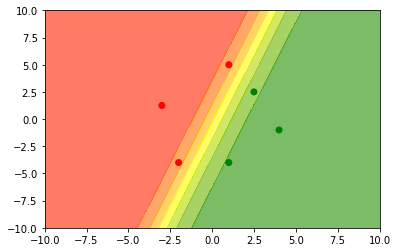


[[ 1.23886907 -0.40712395]] [-0.33608313]


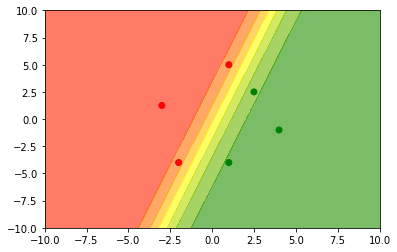


[[ 1.26180327 -0.41455441]] [-0.35184149]


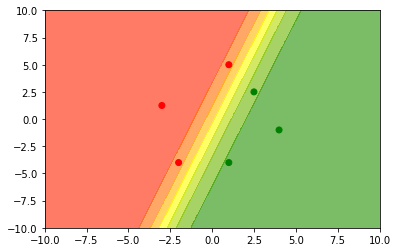


[[ 1.28378757 -0.42167749]] [-0.3669931]


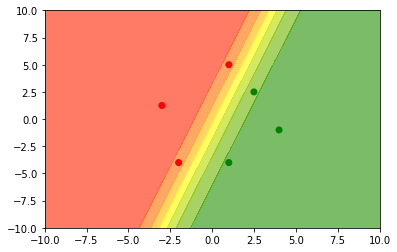


[[ 1.30489389 -0.42851631]] [-0.38157438]


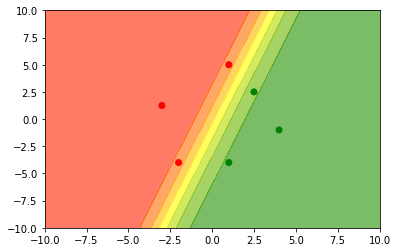


[[ 1.32518633 -0.43509151]] [-0.39561921]


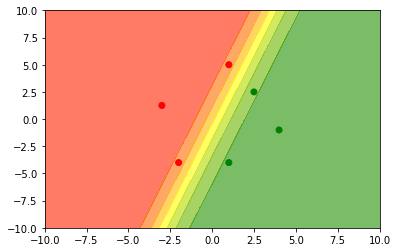


[[ 1.34472226 -0.4414216 ]] [-0.40915904]


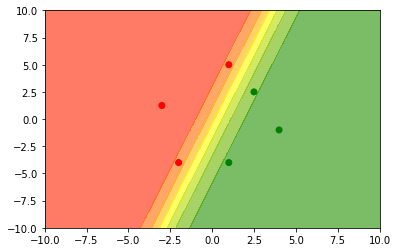


[[ 1.36355326 -0.44752324]] [-0.42222309]


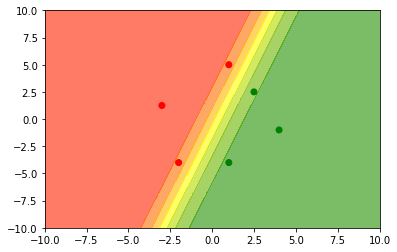


[[ 1.3817259 -0.4534115]] [-0.43483847]


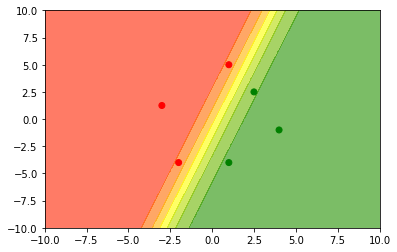


[[ 1.39928235 -0.45910002]] [-0.44703037]


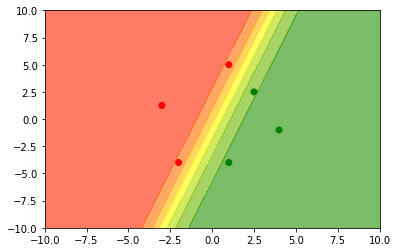


[[ 1.41626094 -0.46460121]] [-0.45882218]


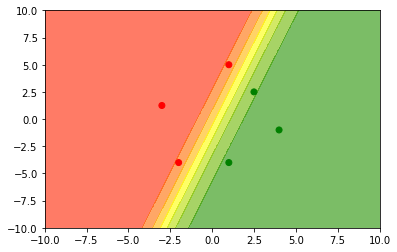


[[ 1.4326966 -0.4699264]] [-0.47023563]


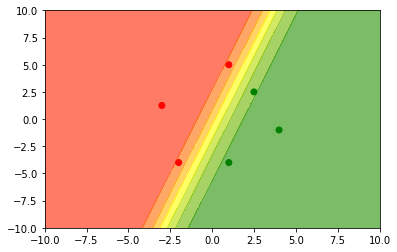

In [34]:
sn.fit(X, Y, 1, 0.25, True)
N = 30
plt.figure(figsize = (10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    plot_sn(X, Y, sn)
    sn.fit(X, Y, 1, 0.25, False)

# Working on some real dataset

# Load Data

In [35]:
!ls

'Material Provided'   mobile_cleaned.csv  'Sigmoid Neuron.ipynb'


In [36]:
data = pd.read_csv('mobile_cleaned.csv')

In [37]:
data.head()

PhoneId  Pixel Density  Screen Size  Weight  RAM  Processor_frequency  \
0        0            403         6.26     182    4                  1.8   
1        1            271         6.20     168    3                  1.8   
2        2            409         6.30     168    3                  2.1   
3        4            411         6.00     169    4                  2.2   
4        5            396         6.50     175    4                  2.2   

   Screen to Body Ratio (calculated)  Height  Internal Memory  Capacity  ...  \
0                              80.68   157.9               64      4000  ...   
1                              80.85   156.2               32      4230  ...   
2                              83.68   157.0               32      3500  ...   
3                              74.78   159.8               64      3300  ...   
4                              84.23   160.4               64      3750  ...   

   os_name_Tizen  os_name_iOS  SIM Slot(s)_Dual SIM, GSM+CDMA  \
0              0            0                               0   
1              0            0                               0   
2              0            0                               0   
3              0            0                               0   
4              0            0                               0   

   SIM Slot(s)_Dual SIM, GSM+GSM  SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE  \
0                              0                                          1   
1                              0                                          1   
2                              0                                          1   
3                              1                                          0   
4                              0                                          1   

   SIM Slot(s)_Single SIM, GSM  Sim1_2G  Sim1_3G  Sim1_4G  Rating  
0                            0        0        0        1     4.5  
1                            0        0        0        1     4.5  
2                            0        0        0        1     4.4  
3                            0        0        0        1     4.3  
4                            0        0        0        1     4.4  

[5 rows x 88 columns]

In [38]:
data.shape

(341, 88)

<strong>To make the dataset out of this.</strong>
<br> <font color = blue>X</font> = All rows except the last one.
<br> <font color = blue>Y</font> = Last row.
<br> Axis = 0 for row
<br> Axis = 1 for column

In [39]:
X = data.drop('Rating', axis = 1)

In [40]:
# Y converted to np array by .values
Y = data['Rating'].values

In [41]:
X.head()

PhoneId  Pixel Density  Screen Size  Weight  RAM  Processor_frequency  \
0        0            403         6.26     182    4                  1.8   
1        1            271         6.20     168    3                  1.8   
2        2            409         6.30     168    3                  2.1   
3        4            411         6.00     169    4                  2.2   
4        5            396         6.50     175    4                  2.2   

   Screen to Body Ratio (calculated)  Height  Internal Memory  Capacity  ...  \
0                              80.68   157.9               64      4000  ...   
1                              80.85   156.2               32      4230  ...   
2                              83.68   157.0               32      3500  ...   
3                              74.78   159.8               64      3300  ...   
4                              84.23   160.4               64      3750  ...   

   os_name_Other  os_name_Tizen  os_name_iOS  SIM Slot(s)_Dual SIM, GSM+CDMA  \
0              0              0            0                               0   
1              0              0            0                               0   
2              0              0            0                               0   
3              0              0            0                               0   
4              0              0            0                               0   

   SIM Slot(s)_Dual SIM, GSM+GSM  SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE  \
0                              0                                          1   
1                              0                                          1   
2                              0                                          1   
3                              1                                          0   
4                              0                                          1   

   SIM Slot(s)_Single SIM, GSM  Sim1_2G  Sim1_3G  Sim1_4G  
0                            0        0        0        1  
1                            0        0        0        1  
2                            0        0        0        1  
3                            0        0        0        1  
4                            0        0        0        1  

[5 rows x 87 columns]

In [42]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

<strong>We need to binarize our output, <font color = red>Why?</font>.</strong>
<br>Well this is because our sigmoid neuron can work with the real valued output (Y) but will compute accuracy on the binarized value of Y.
<br><br>Now, instead of making a new Y_binarized, we can add a new column to our dataset.

In [43]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [44]:
data['Class']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      1
10     1
11     0
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
311    0
312    0
313    1
314    1
315    0
316    0
317    0
318    0
319    0
320    0
321    1
322    1
323    1
324    0
325    0
326    1
327    0
328    0
329    0
330    0
331    1
332    0
333    0
334    0
335    1
336    0
337    0
338    0
339    0
340    1
Name: Class, Length: 341, dtype: int64

In [45]:
data['Class'].value_counts()

0    182
1    159
Name: Class, dtype: int64

In [46]:
data['Class'].value_counts(normalize = True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

As after normalizing, the ratio of 1 to 0 outputs is about 7:3, hence we must change the value of the threshold to get it close to 1:1.

In [47]:
Y_binarised = data['Class'].values

In [48]:
Y_binarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

## Standardisation

Since each column has different data of different ranges, so it gets really difficult to manage such a dataset. For our convenience and ease of model we use standardisation of the data.
<br><br>
<strong>Standardised column means that it has-</strong>
<br>
- <strong><font color = green>MEAN = 0</font></strong>
- <strong><font color = green>Standard Deviation = 1</font></strong>
<br><br>
For standardisation we'll import the library sklearn
<br>
<em><strong>from sklearn.preprocessing import StandardScaler</strong></em>


In [49]:
R = np.random.random([100, 1])

In [50]:
R

array([[0.72952435],
       [0.05944773],
       [0.92642859],
       [0.97043202],
       [0.55397594],
       [0.21742196],
       [0.03950104],
       [0.19491811],
       [0.34628617],
       [0.04692297],
       [0.69375245],
       [0.37516342],
       [0.65111186],
       [0.15933517],
       [0.16568805],
       [0.50324632],
       [0.80546078],
       [0.26372737],
       [0.07686561],
       [0.16866575],
       [0.51336709],
       [0.75522276],
       [0.35365753],
       [0.67098516],
       [0.17771038],
       [0.99964226],
       [0.65450548],
       [0.774281  ],
       [0.11421703],
       [0.04108706],
       [0.5963526 ],
       [0.22740802],
       [0.68346161],
       [0.19489572],
       [0.28163245],
       [0.8818093 ],
       [0.206403  ],
       [0.08263589],
       [0.46450732],
       [0.85082759],
       [0.7835024 ],
       [0.50269001],
       [0.95957352],
       [0.94867385],
       [0.62804836],
       [0.02507628],
       [0.96625311],
       [0.435

In [51]:
R.shape

(100, 1)

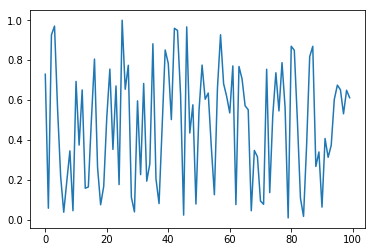

In [52]:
plt.plot(R)
plt.show()

In [53]:
np.mean(R)   # mean

0.48153253215561703

In [54]:
np.std(R)    # standard deviation

0.28689331754017633

In [55]:
scaler = StandardScaler()

In [56]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
scaler.mean_

array([0.48153253])

In [58]:
# RT - R transformed
RT = scaler.transform(R)  

In [59]:
np.mean(RT)     # mean changed, almost very close to zero

6.772360450213455e-17

In [60]:
np.std(RT)    # std. deviation = 1

1.0

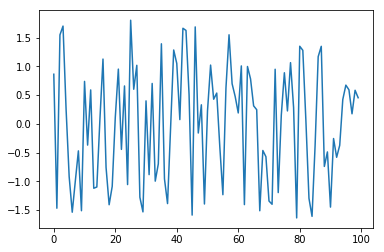

In [61]:
plt.plot(RT)
plt.show()

So our data (RT) is standardised.

Now we have to standardize our input data. So what would be the best approach?
<br><font color = green>
- We standardize first and then split it into test train data</font>
<font color = red>OR</font> 
<font color = green> 
 - First splitting them in test train data and then standardize it.</font>
 <br>Answer is the <strong>second option.</strong>

For test train split, we import the library
<br> <strong>from sklearn.model_selection import train_test_split</strong>

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, stratify = Y_binarised)

In [63]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [64]:
scaler = StandardScaler()

In [65]:
X_scaled_train = scaler.fit_transform(X_train)    # fit_transform to fit and then transform the data
X_scaled_test = scaler.transform(X_test)

/home/tarun/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/tarun/.local/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


**To standardise the output, we scale the minimum value of output to zero and the maximum value to 1 (as per the sigmoid fucntion).**

We need to import the **<font color = green>MinMaxScaler</font>**

In [66]:
minmax_scaler = MinMaxScaler()

In [67]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))

In [68]:
print (np.max(Y_scaled_train), np.min(Y_scaled_train))

1.0 0.0


In [69]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

### Binarisation

In [70]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(-1, 1)))[0][0]

In [71]:
scaled_threshold

0.6800000000000002

In [72]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype(np.int).ravel()  
# ravel() is used to flatten the array, didn't got it?
# remove ravel() and see the difference

In [73]:
Y_binarised_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [74]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype(np.int).ravel()

In [75]:
Y_binarised_test

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

**Till now, our data has been prepared completely. Now we'll apply out sigmoid model to the prepared data.**

# Train  on Real Data

In [76]:
sn = SigmoidNeuron()

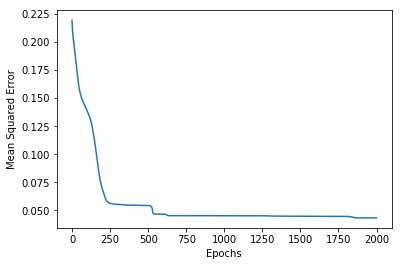

In [77]:
sn.fit(X_scaled_train, Y_scaled_train, epochs = 2000, learning_rate = 0.015, display_loss = True)

In [78]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

Binarising the predicted output...

In [79]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype(np.int).ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype(np.int).ravel()

**Computing the accuracy**
<br>For this we will import the following library
<br> **from sklearn.metrics import accuracy_score**

In [80]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [81]:
print(accuracy_train, accuracy_test)

0.8117647058823529 0.8604651162790697
